### Chapter5_Queation 8

We will now perform cross-validation on a simulated data set.

(a) Generate a simulated data set as follows:

```
rng = np.random. default_rng (1)
x = rng.normal(size =100)
y = x - 2 * x**2 + rng.normal(size =100)
```

In this data set, what is n and what is p? Write out the model used to generate the data in equation form.

In [27]:
import numpy as np
#rng = np.random. default_rng (1)
rng = np.random. default_rng (314657018)
x = rng.normal(size =100)
y = x - 2 * x**2 + rng.normal(size =100)

Ans: n=100, p=2(x, x<sup>2</sup>)<br>
Equation as the following...<br>

$
y = x - 2x^2 + \varepsilon, \quad \varepsilon \sim N(0, 1)
$


(b) Create a scatterplot of X against Y . Comment on what you find.

<font color="blue">Ans: The relationship between X and Y is not linear, is parabola instead. i.e. If we get this type of data, fit a simple linear regression would be taken in the first place to model.</font>

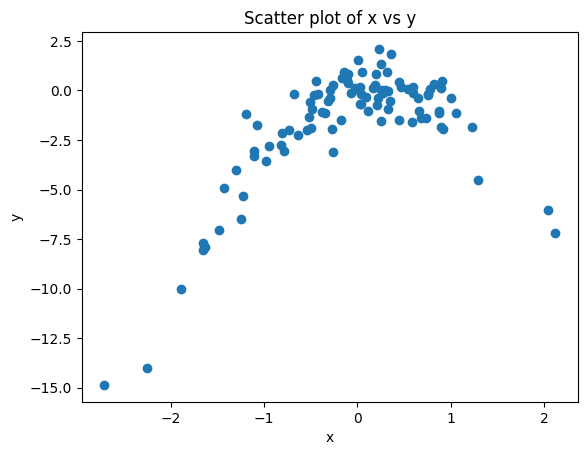

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Scatter plot
plt.figure()
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Scatter plot of x vs y")
plt.show()

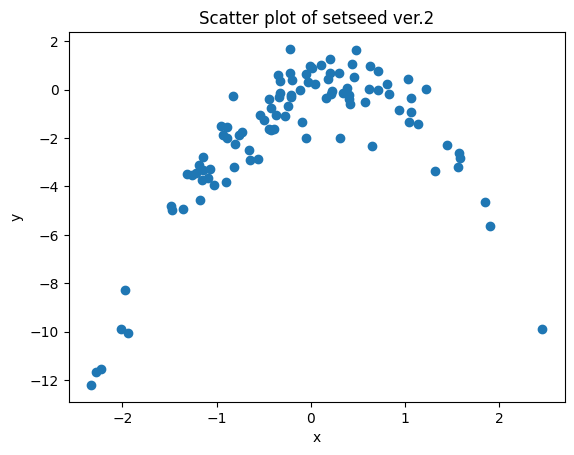

In [28]:
# Scatter plot
plt.figure()
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Scatter plot of setseed ver.2")
plt.show()

(c) Set a random seed, and then compute the LOOCV errors that result from fitting the following four models using least squares:<br>
i. Y= β<sub>0</sub> + β<sub>1</sub>X + ϵ<br>
ii. Y= β<sub>0</sub> + β<sub>1</sub>X + β<sub>2</sub>X<sup>2</sup> + ϵ<br>
iii. Y= β<sub>0</sub> + β<sub>1</sub>X + β<sub>2</sub>X<sup>2</sup> + β<sub>3</sub>X<sup>3</sup> + ϵ<br>
iv. Y= β<sub>0</sub> + β<sub>1</sub>X + β<sub>2</sub>X<sup>2</sup> + β<sub>3</sub>X<sup>3</sup> + β<sub>4</sub>X<sup>4</sup> + ϵ.<br>
Note you may find it helpful to use the <font color="brown">data.frame()</font> function to create a single data set containing both X and Y.

In [ ]:
import numpy as np
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LinearRegression

# (2) LOOCV function
loo = LeaveOneOut()

def loocv_error(X, y):
    model = LinearRegression()
    errors = []
    for train_idx, test_idx in loo.split(X):
        model.fit(X[train_idx], y[train_idx])
        pred = model.predict(X[test_idx])[0]
        errors.append((y[test_idx][0] - pred)**2)
    return np.mean(errors)

# (3) Create polynomial predictors
X1 = x.reshape(-1, 1)
X2 = np.column_stack([x, x**2])
X3 = np.column_stack([x, x**2, x**3])
X4 = np.column_stack([x, x**2, x**3, x**4])

# (4) Compute LOOCV errors
errors = {
    "Model 1 (linear)": loocv_error(X1, y),
    "Model 2 (quadratic)": loocv_error(X2, y),
    "Model 3 (cubic)": loocv_error(X3, y),
    "Model 4 (quartic)": loocv_error(X4, y),
}

# (5) Print results
for model, err in errors.items():
    print(f"{model}: {err:.6f}")


Model 1 (linear): 6.633030
Model 2 (quadratic): 1.122937
Model 3 (cubic): 1.301797
Model 4 (quartic): 1.332394


(d) Repeat (c) using another random seed, and report your results. Are your results the same as what you got in (c)? Why?

<font color="blue">Ans: Apprently no. The reason is that we set different seeds to generate different datas. Based on the different datas, we won't get identical estimated model.</font>

In [30]:
# (3) Create polynomial predictors
X1 = x.reshape(-1, 1)
X2 = np.column_stack([x, x**2])
X3 = np.column_stack([x, x**2, x**3])
X4 = np.column_stack([x, x**2, x**3, x**4])

# (4) Compute LOOCV errors
errors = {
    "Model 1 (linear)": loocv_error(X1, y),
    "Model 2 (quadratic)": loocv_error(X2, y),
    "Model 3 (cubic)": loocv_error(X3, y),
    "Model 4 (quartic)": loocv_error(X4, y),
}

# (5) Print results
print("LOOCV errors of ver.2")
for model, err in errors.items():
    print(f"{model}: {err:.6f}")

LOOCV errors of ver.2
Model 1 (linear): 7.374957
Model 2 (quadratic): 0.753300
Model 3 (cubic): 0.745107
Model 4 (quartic): 0.756182


(e) Which of the models in (c) had the smallest LOOCV error? Is this what you expected? Explain your answer.

<font color="blue">Ans: In ver.1 Model 2 (quadratic) has the smallest LOOCV error; in the meantime, the ver.2 get the smallest one in Model 3 (cubic). Honestly, only ver1. gives what I expected. But, that's the way Statistics work. "All models are wrong, but some are useful."</font>

(f) Comment on the statistical significance of the coefficient estimates that results from fitting each of the models in (c) using least squares. Do these results agree with the conclusions drawn based on the cross-validation results?


---

## **(f) Answer**

When fitting the four polynomial models using least squares, the statistical significance of the estimated coefficients reflects the true underlying quadratic structure of the data-generating process.

In the **linear model**, the coefficient for $x$ is statistically significant, but the model omits the important quadratic term and therefore fails to capture the nonlinear relationship.

In the **quadratic model**, both $x$ and $x^2$ are highly significant, which is consistent with the true model $ y = x - 2x^2 + \varepsilon $. This model correctly includes all necessary terms.

In the **cubic** and **quartic models**, the higher-order terms $x^3$ and $x^4$ are not statistically significant, while the coefficients for $x$ and $x^2$ remain significant. This indicates that the additional polynomial terms do not contribute meaningfully to explaining the variation in (y).

These significance results align with the LOOCV findings:
the quadratic model has the lowest prediction error, the linear model underfits, and the cubic and quartic models overfit by including non-significant terms. Therefore, both hypothesis testing and cross-validation agree that the quadratic model is the most appropriate choice.

---


In [31]:
import statsmodels.api as sm

# Add intercept + different polynomial terms
X1_sm = sm.add_constant(X1)     # linear
X2_sm = sm.add_constant(X2)     # quadratic
X3_sm = sm.add_constant(X3)     # cubic
X4_sm = sm.add_constant(X4)     # quartic

models = {
    "Model 1 (linear)": X1_sm,
    "Model 2 (quadratic)": X2_sm,
    "Model 3 (cubic)": X3_sm,
    "Model 4 (quartic)": X4_sm
}

print("\n===== Coefficient Significance (OLS) =====")
for name, X in models.items():
    print("\n------------------------------------------")
    print(name)
    ols = sm.OLS(y, X).fit()
    print(ols.summary())



===== Coefficient Significance (OLS) =====

------------------------------------------
Model 1 (linear)
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     26.66
Date:                Sun, 16 Nov 2025   Prob (F-statistic):           1.27e-06
Time:                        15:00:43   Log-Likelihood:                -236.95
No. Observations:                 100   AIC:                             477.9
Df Residuals:                      98   BIC:                             483.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------